In [130]:
import sys
import h5py
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import compress 

sys.path.append('../')
from envir import config

In [20]:
#Example: print file path
config.dataFol+'spl/2017/sonycnode-b827eb0d8af7.sonyc.h5'

'/gws_gpfs/projects/project-urban_birds/workspace/share/data/spl/2017/sonycnode-b827eb0d8af7.sonyc.h5'

In [21]:
#Example: read in h5 file
f = h5py.File(config.dataFol+'/spl/2017/sonycnode-b827eb0d8af7.sonyc.h5','r')

## Explore the dense bird data (#1 class, 22 sensors, 4 years) 

### I. Start with 1 sensor

In [22]:
#path of sensor: b827eb0d8af7 
config.dataFol+'YAMNet/dense-bird/b827eb0d8af7_yamnet-pred-bird.h5'

'/gws_gpfs/projects/project-urban_birds/workspace/share/data/YAMNet/dense-bird/b827eb0d8af7_yamnet-pred-bird.h5'

In [ ]:
#read in file
sensor = h5py.File(config.dataFol+'YAMNet/dense-bird/b827eb0d8af7_yamnet-pred-bird.h5','r')

In [ ]:
#The keys are named after sensor_name_timestamp with an interval of 10 seconds
list(sensor.keys())[:5] 

In [80]:
#Print the Start timestamp and end timestamp
timeStart = float(min(sensor.keys()).split('_')[1])
timeEnd = float(max(sensor.keys()).split('_')[1])
print('Start Timestamp: ',datetime.datetime.fromtimestamp(timeStart).strftime('%Y-%m-%d %H:%M:%S'))
print('End Timstamp: ',datetime.datetime.fromtimestamp(timeEnd).strftime('%Y-%m-%d %H:%M:%S'))

Start Timestamp:  2017-02-24 00:00:10
End Timstamp:  2020-03-24 23:59:26


In [185]:
time2 = 1487912470.39
print('time2: ',datetime.datetime.fromtimestamp(time2).strftime('%Y-%m-%d %H:%M:%S'))
time2 = 1487912533.50
print('time2: ',datetime.datetime.fromtimestamp(time2).strftime('%Y-%m-%d %H:%M:%S'))
time2 = 1487912595.01
print('time2: ',datetime.datetime.fromtimestamp(time2).strftime('%Y-%m-%d %H:%M:%S'))


time2:  2017-02-24 00:01:10
time2:  2017-02-24 00:02:13
time2:  2017-02-24 00:03:15


#### Take a look at the first key

In [81]:
#Print the data shape and data type of the first timestamp 
dset = sensor['b827eb0d8af7_1487912410.99']
print('Shape: ',dset.shape)
print('Data Type: ',dset.dtype)

#Print the data values and average of the first timestamp
n1 = np.array(dset)
print('19 predictions: ',n1)
print('Mean predictions:',n1.mean())

Shape:  (19,)
Data Type:  float32
19 predictions:  [0.01641705 0.00660421 0.00527448 0.00369878 0.00204709 0.00676622
 0.0045423  0.01119252 0.00244132 0.01200761 0.03924123 0.01284725
 0.01158993 0.00750579 0.01904794 0.04578009 0.03885683 0.01679826
 0.00417646]
Mean predictions: 0.014043966


2017-02-24 00:00:10 2017-03-20 12:28:17

2018-02-24 00:00:16 2018-03-24 23:59:13

2019-02-24 00:00:32 2019-03-24 23:59:23

2020-02-24 00:00:32 2020-03-24 23:59:26


#### Get timestamps, datetime, average prediction for all keys

In [93]:
#Get all timestamps in this sensor dataset
timestamps = [datetime.datetime.fromtimestamp(float(time.split('_')[1])).strftime('%Y-%m-%d %H:%M:%S') \
              for time in list(sensor.keys())]
#Get all days in this sensor dataset
days = set([timestamp[:10] for timestamp in timestamps])

In [96]:
#Calculate the average prediction for each timestamp (every ten seconds)
average_pred = [np.array(sensor[timestamp]).mean() for timestamp in sensor.keys()]

In [97]:
print('Number of timstamps :',len(timestamps))
print('Number of datetime (year-month-day):',len(days))
print('Number of average predictions:',len(average_pred))

Number of timstamps : 128580
Number of datetime (year-month-day): 114
Number of average predictions: 128580


#### Filter timestamps, average predictions by threshold

#### Method 1: Using Array

In [134]:
#initialize threshold
thres = 0.5

#map a list of boolean using threshold
res_index = list(map(lambda x: True if x >= thres else False,averagePred))

#filter average_pred and timstamps using boolean list
res_average_pred = list(compress(averagePred, res_index)) 
res_timestamps = list(compress(timestamps, res_index)) 

#combine res_timestamps with res_average_pred
possible_predictions = list(zip(res_timestamps,res_average_pred))
print('Possible timestamps: ',possible_predictions)

Possible timestamps:  [('2018-02-24 07:58:40', 0.7223531), ('2018-03-12 08:33:13', 0.8353193)]


#### Method 2: Using Dataframe

In [161]:
df=pd.DataFrame(data={'average_pred': average_pred },index = timestamps)

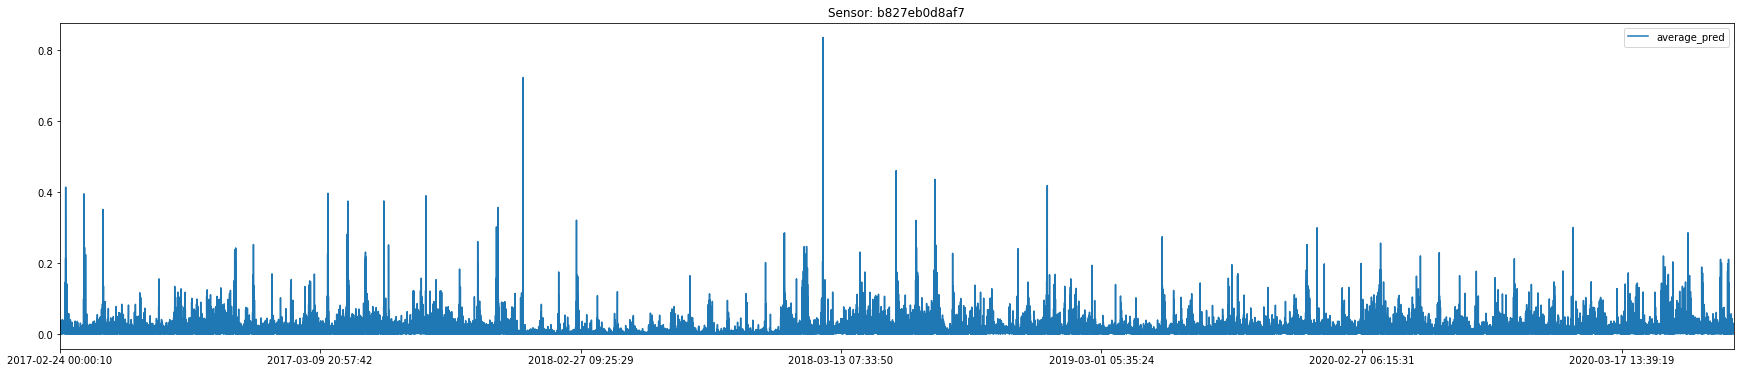

In [165]:
df.plot(figsize=(30,6),title='Sensor: b827eb0d8af7',legend = True)

In [163]:
df_filter = df[df['average_pred'] >= thres]
df_filter

,average_pred
2018-02-24 07:58:40,0.722353
2018-03-12 08:33:13,0.835319


In [171]:
print(df_filter)

                     average_pred
2018-02-24 07:58:40      0.722353
2018-03-12 08:33:13      0.835319


In [ ]:
#the probability generate on average for every half minute
#0.5

#pivot table of time

### II. Iterate over all sensors

In [169]:
from os import listdir
from os.path import isfile, join

yamNetFiles = [f for f in listdir(config.dataFol+'YAMNet/dense-bird') if isfile(join(config.dataFol+'YAMNet/dense-bird', f))]


In [174]:
yamNetFiles1 = yamNetFiles[:2]
yamNetFiles1

['b827eb0d8af7_yamnet-pred-bird.h5', 'b827ebf31214_yamnet-pred-bird.h5']

In [176]:
thres = 0.5
for file in yamNetFiles:
    print('Sensor: ', file)
    #Read in file
    sensor = h5py.File(config.dataFol+'YAMNet/dense-bird/'+file,'r')
    #Get all timestamps in this sensor dataset
    timestamps = [datetime.datetime.fromtimestamp(float(time.split('_')[1])).strftime('%Y-%m-%d %H:%M:%S') \
              for time in list(sensor.keys())]
    print('timestamps done')

    #Get all days in this sensor dataset
    days = set([timestamp[:10] for timestamp in timestamps])
    print('days done')
    
    #Calculate the average prediction for each timestamp (every ten seconds)
    average_pred = [np.array(sensor[timestamp]).mean() for timestamp in sensor.keys()]
    print('average_pred done')

    #Create dataframe
    df=pd.DataFrame(data={'average_pred': average_pred },index = timestamps)
    df_filter = df[df['average_pred'] >= thres]
    print(df_filter)
    print('--------------------------')

Sensor:  b827eb0d8af7_yamnet-pred-bird.h5
timestamps done
days done
average_pred done
                     average_pred
2018-02-24 07:58:40      0.722353
2018-03-12 08:33:13      0.835319
--------------------------
Sensor:  b827ebf31214_yamnet-pred-bird.h5
timestamps done
days done
average_pred done
                     average_pred
2018-03-07 08:27:46      0.594647
2018-03-09 06:47:00      0.513344
2019-03-09 06:46:51      0.613318
--------------------------
Sensor:  b827ebf9d204_yamnet-pred-bird.h5
timestamps done
days done
average_pred done
                     average_pred
2018-02-26 17:59:46      0.515213
2018-03-08 14:38:13      0.565135
2019-03-21 07:22:20      0.626945
2019-03-22 09:52:10      0.616807
--------------------------
Sensor:  b827ebefb215_yamnet-pred-bird.h5
timestamps done
days done
average_pred done
                     average_pred
2018-02-27 07:03:27      0.687925
2018-02-27 07:27:15      0.698560
2018-02-27 07:28:11      0.690877
2018-02-27 07:48:07      0.5309

timestamps done
days done
average_pred done
Empty DataFrame
Columns: [average_pred]
Index: []
--------------------------


In [179]:

sensor = h5py.File(config.dataFol+'YAMNet/dense-bird/b827eb5a9021_yamnet-pred-bird.h5','r')
#Get all timestamps in this sensor dataset
timestamps = [datetime.datetime.fromtimestamp(float(time.split('_')[1])).strftime('%Y-%m-%d %H:%M:%S') \
          for time in list(sensor.keys())]
print('timestamps done')

#Get all days in this sensor dataset
days = set([timestamp[:10] for timestamp in timestamps])
print('days done')

#Calculate the average prediction for each timestamp (every ten seconds)
average_pred = [np.array(sensor[timestamp]).mean() for timestamp in sensor.keys()]
print('average_pred done')

#Create dataframe
df=pd.DataFrame(data={'average_pred': average_pred },index = timestamps)

timestamps done
days done
average_pred done


In [181]:

print(df_filter)


Empty DataFrame
Columns: [average_pred]
Index: []


## Explore the dense-521 data 521 classes, 1 sensor, 1 year


In [84]:
#Read in file
f2 = h5py.File(config.dataFol+'YAMNet/dense-521/b827ebe3b72c_yamnet-pred.h5','r')

In [86]:
len(f2.keys())

8643

In [87]:
dset2 = f2['b827ebe3b72c_1582520436.21']

In [88]:
dset2.shape

(19, 521)

In [89]:
n2 = np.array(dset2)
n2

array([[3.5439994e-02, 5.6364755e-03, 8.5252646e-04, ..., 1.8240128e-03,
        2.8833552e-04, 9.3378657e-07],
       [1.6384579e-02, 1.5236499e-03, 8.0664270e-04, ..., 8.0931978e-03,
        4.8502311e-03, 5.0043738e-05],
       [8.1337395e-04, 7.2681760e-05, 6.6112640e-05, ..., 2.4913363e-03,
        3.1138348e-04, 4.2757165e-06],
       ...,
       [1.4777657e-03, 1.6501413e-04, 7.5679120e-05, ..., 8.3989436e-03,
        1.1330297e-03, 5.0512035e-06],
       [2.0984136e-03, 3.0551633e-05, 1.8826629e-05, ..., 2.0140340e-04,
        5.5086963e-05, 5.9725608e-08],
       [1.9480545e-03, 3.3878416e-04, 4.7467871e-05, ..., 1.2510383e-04,
        1.6782786e-05, 2.1984190e-08]], dtype=float32)

In [91]:
len(n2[0])

521